<a href="https://colab.research.google.com/github/Belal-AI/Segmentation_and_tranfare-learnin_class-project/blob/main/digi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [83]:
import cv2 
import matplotlib.pylab as plt
import numpy as np
from sklearn.metrics import jaccard_score
import os

In [101]:
def Handling_create_thresh(img):
      brightness = 40
      contrast = 50
      img = np.int16(img)
      img = img * (contrast/127+1) - contrast + brightness
      img = np.clip(img, 0, 255)
      img = np.uint8(img)
      image2=cv2.medianBlur(img,7)
      (T, threshInv) = cv2.threshold(image2, 0, 255,cv2.THRESH_BINARY| cv2.THRESH_OTSU)
      return threshInv





In [102]:
from posix import listdir
images_masked_min=[]
images_masked_orignal=[]
images=[]
encoder=-1
label=[]
path="/content/drive/MyDrive/_Output"
folders=os.listdir("/content/drive/MyDrive/_Output")
for folder in folders:
  folder_path=path+'/'+folder
  encoder=encoder+1
  for image in os.listdir(folder_path):
    img=cv2.imread(path+'/'+folder+'/'+image,0)
    img=Handling_create_thresh(img)
    images_masked_min.append(img)
    label.append(encoder)

    

  

  

1971


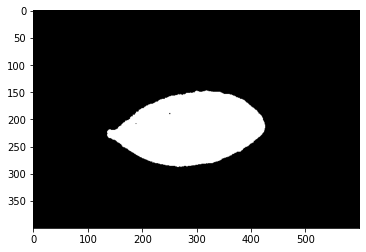

In [104]:
plt.imshow(images_masked_min[0],cmap='gray')
print(len(label))

In [79]:
img=cv2.imread(r"/content/0009_0009.JPG",0)
maskedimg=cv2.imread(r"/content/0009_0009_masked.JPG",0)


In [77]:
type(img)

numpy.ndarray

0.9656824603792129

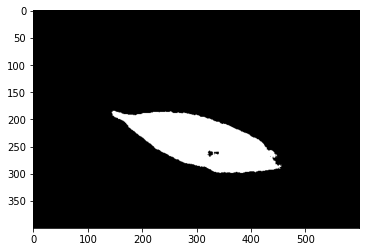

In [81]:
plt.imshow(Handling_create_thresh(img),cmap='gray')
jaccard_score(maskedimg.flatten(),Handling_create_thresh(img).flatten(),average="micro")

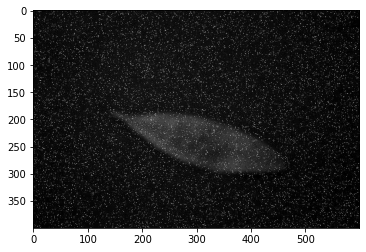

In [27]:
brightness = 40
contrast = 50
img = np.int16(img)
img = img * (contrast/127+1) - contrast + brightness
img = np.clip(img, 0, 255)
img = np.uint8(img)
plt.imshow(img,cmap='gray')

#cv2.imshow('img',img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

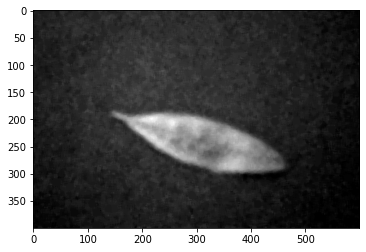

In [30]:
image2=cv2.medianBlur(img,7)
plt.imshow(image2,cmap='gray')

#cv2.imshow('median',image2)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

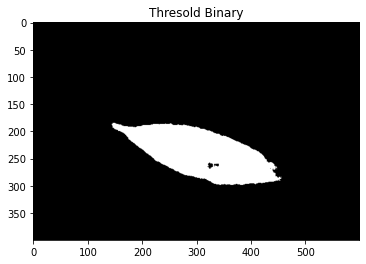

In [31]:
(T, threshInv) = cv2.threshold(image2, 0, 255,cv2.THRESH_BINARY| cv2.THRESH_OTSU)
plt.imshow(threshInv, cmap="gray")
plt.title('Thresold Binary')
plt.show()